In [8]:
%load_ext autoreload
%autoreload 2

from ocean_navigation_simulator.generative_error_model.generative_model_metrics import rmse_over_time_xr, rmse_over_time, vector_correlation_over_time_xr, vector_correlation
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Compute Synthetic RMSE

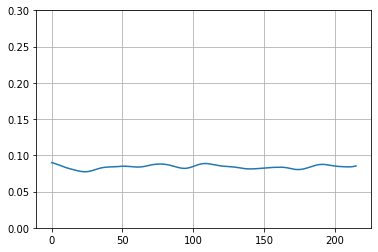

In [9]:
error_data_root = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/synthetic_error/area1"
files = os.listdir(error_data_root)
rmse = []
for file in files:
    data = xr.open_dataset(os.path.join(error_data_root, file))
    rmse.append(rmse_over_time_xr(data))
rmse = np.array(rmse).mean(axis=0)

plt.plot(range(len(rmse)), rmse)
plt.ylim([0, 0.3])
plt.grid()

## Compute Empirical RMSE

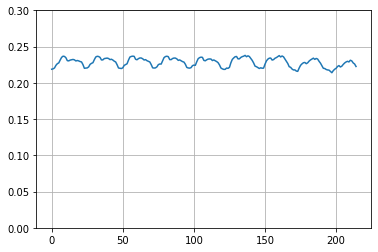

In [10]:
error_data_root = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/dataset_forecast_error/area1"
files = sorted(os.listdir(error_data_root))
rmse_data = []
for file in files[:50]:
    data = pd.read_csv(os.path.join(error_data_root, file))
    rmse_data.append(rmse_over_time(data)["rmse"])
# take average for each hour
rmse_data = np.array(rmse_data).mean(axis=0)

plt.plot(range(len(rmse_data)), rmse_data)
plt.ylim([0, 0.3])
plt.grid()

## Compute Synthetic Vector Correlation

(37, 216)


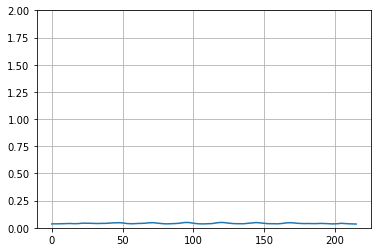

In [21]:
# forecast + synth error vs forecast

error_data_root = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/synthetic_error/area1"
error_files = sorted(os.listdir(error_data_root))

forecast_root = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/forecasts/area1"
forecast_files = sorted(os.listdir(forecast_root))[:len(error_files)]

vec_corr = []
for error_file, forecast_file in zip(error_files, forecast_files):
    error_data = xr.open_dataset(os.path.join(error_data_root, error_file))
    forecast_data = xr.open_dataset(os.path.join(forecast_root, forecast_file))
    vec_corr.append(vector_correlation_over_time_xr(error_data, forecast_data))
print(np.array(vec_corr).shape)
vec_corr = np.array(vec_corr).mean(axis=0)

plt.plot(range(len(vec_corr)), vec_corr)
plt.ylim([0, 2.0])
plt.grid()

## Compute Empirical Vector Correlation

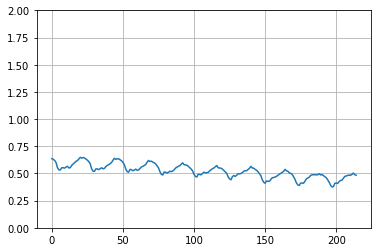

In [12]:
# use forecast error + forecast or alternatively buoy data directly
# use forecast+error vs forecast
from ocean_navigation_simulator.generative_error_model.Dataset import Dataset

forecast_error_root = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/dataset_forecast_error/area1"
error_files = sorted(os.listdir(forecast_error_root))
vec_corr_tot = []
for file in error_files:
    data = pd.read_csv(os.path.join(forecast_error_root, file))
    data["hour"] = data["time"].apply(lambda x: x[:13])
    hours = sorted(set(data["hour"].tolist()))
    vec_corr = []
    for hour in hours:
        u_forecast_and_error = data[data["hour"] == hour]["u"]
        v_forecast_and_error = data[data["hour"] == hour]["v"]
        u_forecast = data[data["hour"] == hour]["u_forecast"]
        v_forecast = data[data["hour"] == hour]["v_forecast"]
        # append vec corr for each hour for each file
        vec_corr.append(vector_correlation(u_forecast_and_error, v_forecast_and_error, u_forecast, v_forecast))
    vec_corr_tot.append(np.array(vec_corr))
vec_corr = np.array(vec_corr_tot).mean(axis=0)

plt.plot(range(len(vec_corr)), vec_corr)
plt.ylim([0, 2.0])
plt.grid()

## Compute stats of opensimplex

In [ ]:
import opensimplex
simplex_gen = opensimplex.OpenSimplex(seed=12345678)
num_pts = int(1e9)
rand_x = np.random.choice(list(range(1000)), num_pts)
rand_y = np.random.choice(list(range(1000)), num_pts)
samples = []
for i in range(num_pts):
    samples.append(simplex_gen.noise2(rand_x[i], rand_y[i]))

samples = np.array(samples)
mean = samples.mean()
var = samples.var()
print(mean, var)